# Semi-Supervised VAE Project

## By VAEGen

### Imports

In [1]:
from plotting import plot_64, plot_64_m2, plot_loss_m1 ,plot_loss_m2, plot_interpolation, make_cm
from models import VAE, M1, M2
from training import run_epochs
from datasets import importMNIST, importFashionMNIST
from loaders import create_loader, create_subset
from classifiers import kneighbors_classifier
import torch

## Meta settings and init values

In [8]:
#Meta settings
dataset="mnist" #("mnist"/"fashion")
batch_size = 512
epochs = 2
latent_dim = 8
learning_rate = 1e-3
image_channels = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = len(classes)
## Initial Values
model = None
dset_train = None
dset_test = None
train_loss = []
train_acc = []
test_loss = []
test_acc = []


In [9]:
## Importing Dataset
if dataset=="mnist":
    dset_train, dset_test = importMNIST()
elif dataset=="fashion":
    dset_train, dset_test = importFashionMNIST()

## Creating Loaders
train_loader = create_loader(dset_train,batch_size)
test_loader = create_loader(dset_test,batch_size)    

## Binarized Datasets
### 2.1.4 (Report)
Plot 64 randomly chosen binarized MNIST samples on a 8 × 8 grid

Plotting non-binarized


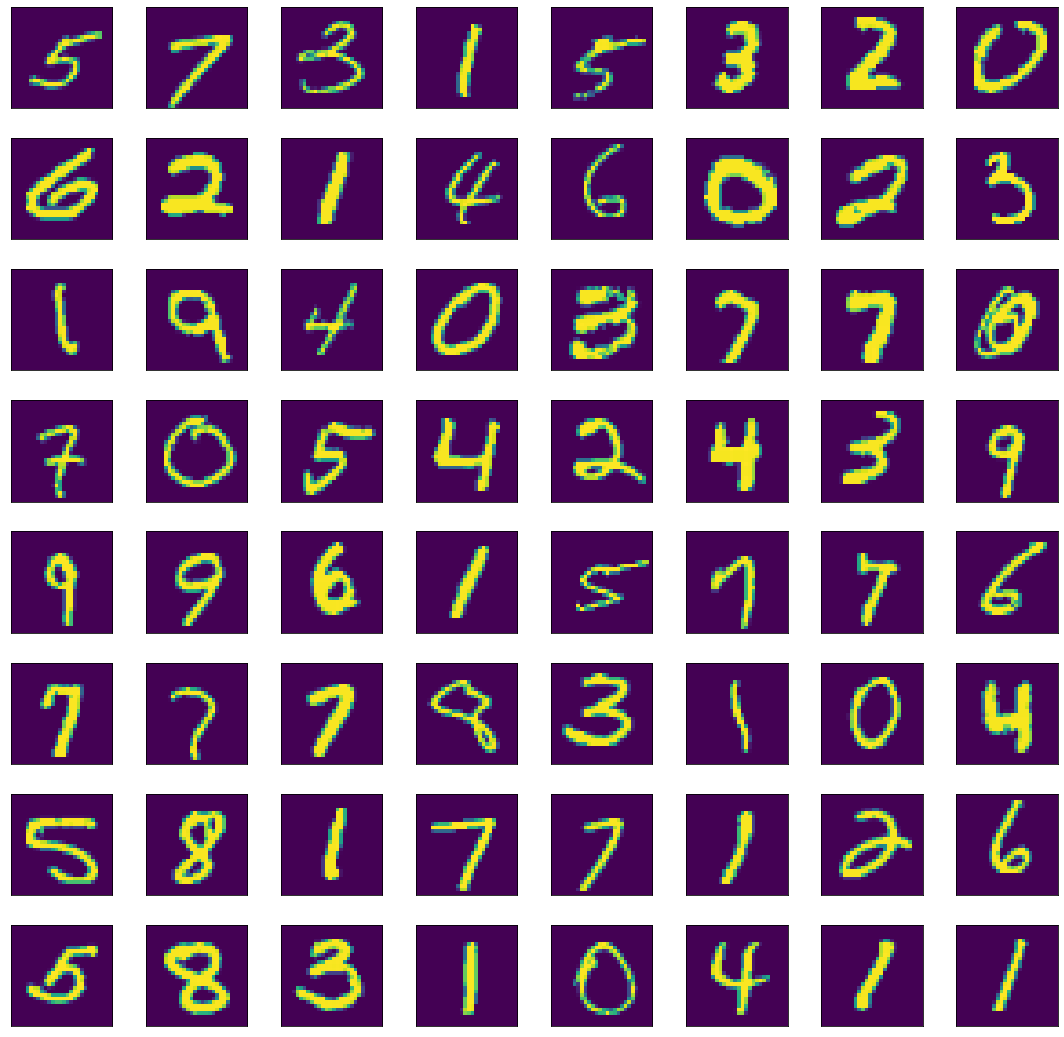

Plotting binarized


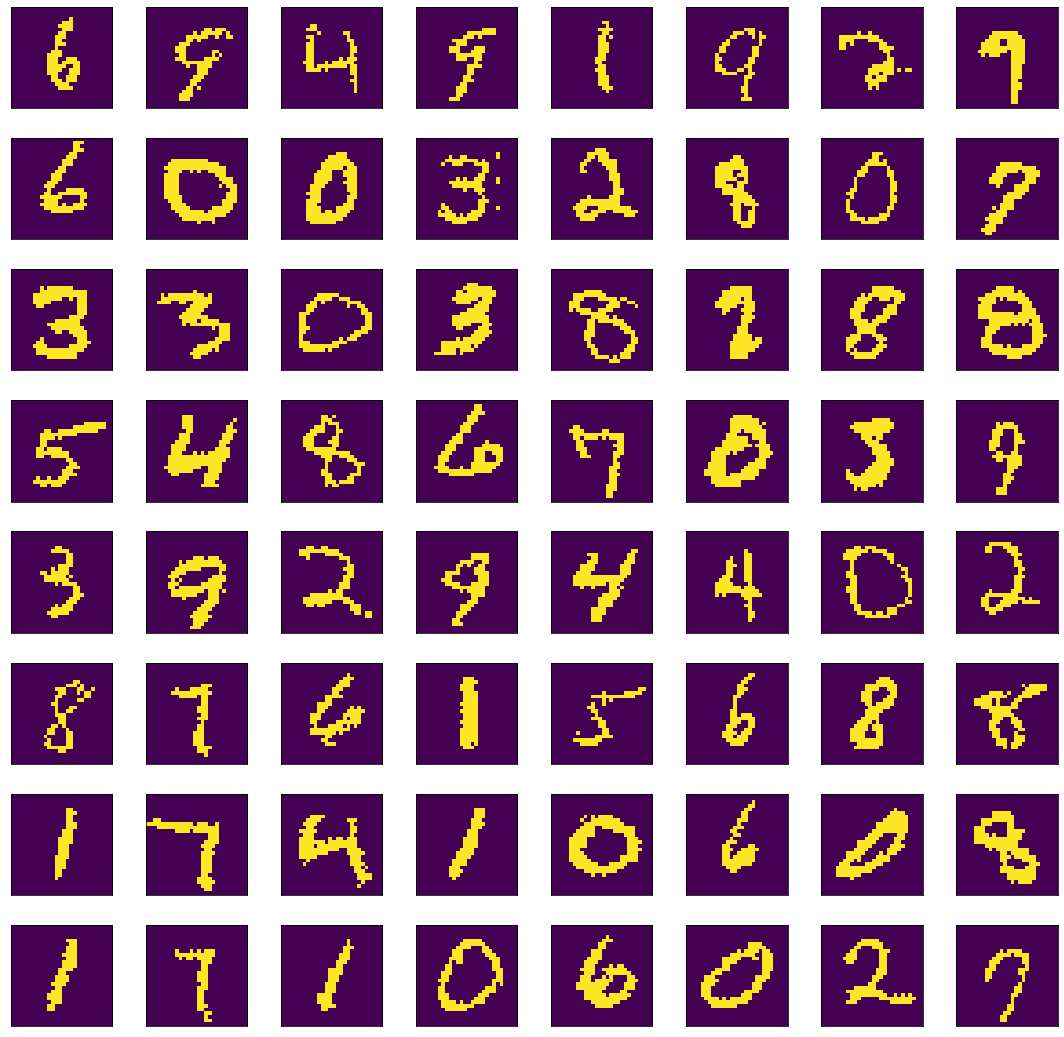

In [10]:
examples = enumerate(train_loader)

# Plot non-binarized
print("Plotting non-binarized")
plot_64(batch=examples)

dset_bin=None

if dataset=="mnist":
    dset_bin, _ = importMNIST(binarized=True)
    
if dataset=="fashion":
    dset_bin, _ = importFashionMNIST(binarized=True)

bin_loader = create_loader(dset_bin,batch_size)

examples = enumerate(bin_loader)
    
print("Plotting binarized")
plot_64(batch=examples)

## VAE

In [11]:
# define model and optimizer
model = VAE(model, image_channels=image_channels,h_dim=1024,z_dim=8).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### 2.2.2 (Report) 
Generate 64 samples from the untrained model and plot them on a 8 × 8 grid.

In [12]:
# Sample before training
print("Sampling before training")
plot_64(model=model, sample=True)

Sampling before training


RuntimeError: Tensor for argument #2 'mat1' is on CPU, but expected it to be on GPU (while checking arguments for addmm)

In [ ]:
# Train network
run_epochs(mode, model, optimizer, epochs, train_loader, test_loader)


### 2.2.4 (Report) 
Generate 64 samples from the trained model and plot them on a 8 × 8 grid.

In [ ]:
# Sample after training
print("Sampling after training")
plot_examples(model=model, sample=True)

### 2.2.5 (Report)
Evaluate the trained model on the test set and report the number.

In [ ]:
model.eval
recon_images, mu, logvar = model(example_data.to(device),example_targets)
loss, bce, kld = loss_fn(recon_images, example_data, mu, logvar)
to_print = "Loss: {:.3f} {:.3f} {:.3f}".format(loss.data.cpu().numpy().tolist()/batch_size, bce.data.cpu().numpy().tolist()/batch_size, kld.data.cpu().numpy().tolist()/batch_size)
print(to_print)